# Module 3 EDA
* Student name: **Chelsea Power**
* Student pace: **part time**
* Instructor name: **Joe San Pietro**

## Purpose

For this project, I will be using music streaming session data from Spotify starting with 51 features to determine if a track will be played or skipped using the predictor variable **not_skipped**.

* The three most important features are: `hour_of_day`, `premium` and `duration`.

## OBSERVE: Understand and Load the Datasets

In [11]:
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df_log = pd.read_csv('log_mini.csv')

#Look at size of the dataset
df_log.shape

(167880, 21)

In [2]:
#Look at the columns and first 10 rows of the dataset
df_log.head()

,session_id,session_position,session_length,track_id_clean,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,...,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1,20,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,False,False,True,0,0,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
1,0_00006f66-33e5-4de7-a324-2d18e439fc1e,2,20,t_9099cd7b-c238-47b7-9381-f23f2c1d1043,False,False,False,True,0,1,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
2,0_00006f66-33e5-4de7-a324-2d18e439fc1e,3,20,t_fc5df5ba-5396-49a7-8b29-35d0d28249e0,False,False,False,True,0,1,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
3,0_00006f66-33e5-4de7-a324-2d18e439fc1e,4,20,t_23cff8d6-d874-4b20-83dc-94e450e8aa20,False,False,False,True,0,1,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
4,0_00006f66-33e5-4de7-a324-2d18e439fc1e,5,20,t_64f3743c-f624-46bb-a579-0f3f9a07a123,False,False,False,True,0,1,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone


In [3]:
#Rename column track_id_clean to track_id
df_log.rename(columns = {'track_id_clean':'track_id'}, inplace = True)

#Reorder colums in dataframe
df_log = df_log.reindex_axis(['track_id','session_id','session_position','session_length','skip_1',
                              'skip_2','skip_3','not_skipped','context_switch','no_pause_before_play',
                              'short_pause_before_play','long_pause_before_play',
                              'hist_user_behavior_n_seekfwd','hist_user_behavior_n_seekback',
                              'hist_user_behavior_is_shuffle','hour_of_day','date','premium','context_type',
                              'hist_user_behavior_reason_start','hist_user_behavior_reason_end'], axis=1)

#Confirm changes
df_log.head()

/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  # Remove the CWD from sys.path while we load stuff.


,track_id,session_id,session_position,session_length,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,...,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end
0,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1,20,False,False,False,True,0,0,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
1,t_9099cd7b-c238-47b7-9381-f23f2c1d1043,0_00006f66-33e5-4de7-a324-2d18e439fc1e,2,20,False,False,False,True,0,1,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
2,t_fc5df5ba-5396-49a7-8b29-35d0d28249e0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,3,20,False,False,False,True,0,1,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
3,t_23cff8d6-d874-4b20-83dc-94e450e8aa20,0_00006f66-33e5-4de7-a324-2d18e439fc1e,4,20,False,False,False,True,0,1,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
4,t_64f3743c-f624-46bb-a579-0f3f9a07a123,0_00006f66-33e5-4de7-a324-2d18e439fc1e,5,20,False,False,False,True,0,1,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone


In [4]:
#Open second csv file
df_music = pd.read_csv('tf_mini.csv')

#Look at size of the dataset
df_music.shape

(50704, 30)

In [5]:
#Look at the columns and first 10 rows of the dataset
df_music.head()

,track_id,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,...,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
0,t_a540e552-16d4-42f8-a185-232bd650ea7d,109.706673,1950,99.975414,0.458040,0.519497,0.504949,0.399767,7.511880,0.817709,...,4,0.935512,-0.033284,-0.411896,-0.028580,0.349438,0.832467,-0.213871,-0.299464,-0.675907
1,t_67965da0-132b-4b1e-8a69-0ef99b32287c,187.693329,1950,99.969430,0.916272,0.419223,0.545530,0.491235,9.098376,0.154258,...,3,0.359675,0.145703,-0.850372,0.123860,0.746904,0.371803,-0.420558,-0.213120,-0.525795
2,t_0614ecd3-a7d5-40a1-816e-156d5872a467,160.839996,1951,99.602549,0.812884,0.425890,0.508280,0.491625,8.368670,0.358813,...,4,0.726769,0.021720,-0.743634,0.333247,0.568447,0.411094,-0.187749,-0.387599,-0.433496
3,t_070a63a0-744a-434e-9913-a97b02926a29,175.399994,1951,99.665018,0.396854,0.400934,0.359990,0.552227,5.967346,0.514585,...,4,0.859075,0.039143,-0.267555,-0.051825,0.106173,0.614825,-0.111419,-0.265953,-0.542753
4,t_d6990e17-9c31-4b01-8559-47d9ce476df1,369.600006,1951,99.991764,0.728831,0.371328,0.335115,0.483044,5.802681,0.721442,...,4,0.562343,0.131931,-0.292523,-0.174819,-0.034422,0.717229,-0.016239,-0.392694,-0.455496


In [6]:
#Merge CSV files into a single file based on track_id
df_music_log = pd.merge(df_music, df_log, on="track_id", how='inner')
df_music_log.head()

,track_id,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,...,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end
0,t_a540e552-16d4-42f8-a185-232bd650ea7d,109.706673,1950,99.975414,0.458040,0.519497,0.504949,0.399767,7.511880,0.817709,...,0,0,0,True,10,2018-07-15,True,user_collection,trackdone,trackdone
1,t_67965da0-132b-4b1e-8a69-0ef99b32287c,187.693329,1950,99.969430,0.916272,0.419223,0.545530,0.491235,9.098376,0.154258,...,0,0,0,False,23,2018-07-14,True,radio,trackdone,trackdone
2,t_67965da0-132b-4b1e-8a69-0ef99b32287c,187.693329,1950,99.969430,0.916272,0.419223,0.545530,0.491235,9.098376,0.154258,...,0,0,0,False,23,2018-07-14,True,radio,backbtn,fwdbtn
3,t_0614ecd3-a7d5-40a1-816e-156d5872a467,160.839996,1951,99.602549,0.812884,0.425890,0.508280,0.491625,8.368670,0.358813,...,1,0,0,False,22,2018-07-14,True,user_collection,trackdone,trackdone
4,t_070a63a0-744a-434e-9913-a97b02926a29,175.399994,1951,99.665018,0.396854,0.400934,0.359990,0.552227,5.967346,0.514585,...,1,0,0,False,20,2018-07-14,True,catalog,trackdone,endplay


In [7]:
#Remove columns
df_music_log = df_music_log.drop(['session_id', 'session_position', 'session_length',
                                  'skip_1','skip_2','skip_3','context_switch','no_pause_before_play',
                                  'short_pause_before_play','long_pause_before_play',
                                  'hist_user_behavior_is_shuffle','context_type','date',
                                  'hist_user_behavior_reason_start','hist_user_behavior_reason_end',
                                  'mode','bounciness'], axis=1)
df_music_log.head()

,track_id,duration,release_year,us_popularity_estimate,acousticness,beat_strength,danceability,dyn_range_mean,energy,flatness,...,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7,not_skipped,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hour_of_day,premium
0,t_a540e552-16d4-42f8-a185-232bd650ea7d,109.706673,1950,99.975414,0.458040,0.519497,0.399767,7.511880,0.817709,0.903753,...,0.349438,0.832467,-0.213871,-0.299464,-0.675907,False,0,0,10,True
1,t_67965da0-132b-4b1e-8a69-0ef99b32287c,187.693329,1950,99.969430,0.916272,0.419223,0.491235,9.098376,0.154258,1.037952,...,0.746904,0.371803,-0.420558,-0.213120,-0.525795,True,0,0,23,True
2,t_67965da0-132b-4b1e-8a69-0ef99b32287c,187.693329,1950,99.969430,0.916272,0.419223,0.491235,9.098376,0.154258,1.037952,...,0.746904,0.371803,-0.420558,-0.213120,-0.525795,False,0,0,23,True
3,t_0614ecd3-a7d5-40a1-816e-156d5872a467,160.839996,1951,99.602549,0.812884,0.425890,0.491625,8.368670,0.358813,1.004268,...,0.568447,0.411094,-0.187749,-0.387599,-0.433496,True,0,0,22,True
4,t_070a63a0-744a-434e-9913-a97b02926a29,175.399994,1951,99.665018,0.396854,0.400934,0.552227,5.967346,0.514585,0.975138,...,0.106173,0.614825,-0.111419,-0.265953,-0.542753,False,0,0,20,True


In [8]:
#Remove more columns
df_music_log = df_music_log.drop(['hist_user_behavior_n_seekfwd','hist_user_behavior_n_seekback',
                                  'acoustic_vector_0','acoustic_vector_1','acoustic_vector_2',
                                  'acoustic_vector_3','acoustic_vector_4','acoustic_vector_5',
                                  'acoustic_vector_6','acoustic_vector_7','acousticness'], axis=1)
df_music_log.head()

,track_id,duration,release_year,us_popularity_estimate,beat_strength,danceability,dyn_range_mean,energy,flatness,instrumentalness,...,loudness,mechanism,organism,speechiness,tempo,time_signature,valence,not_skipped,hour_of_day,premium
0,t_a540e552-16d4-42f8-a185-232bd650ea7d,109.706673,1950,99.975414,0.519497,0.399767,7.511880,0.817709,0.903753,3.254327e-06,...,-11.238,0.386100,0.541606,0.079985,166.287003,4,0.935512,False,10,True
1,t_67965da0-132b-4b1e-8a69-0ef99b32287c,187.693329,1950,99.969430,0.419223,0.491235,9.098376,0.154258,1.037952,8.344854e-12,...,-13.706,0.125000,0.895874,0.083877,95.261002,3,0.359675,True,23,True
2,t_67965da0-132b-4b1e-8a69-0ef99b32287c,187.693329,1950,99.969430,0.419223,0.491235,9.098376,0.154258,1.037952,8.344854e-12,...,-13.706,0.125000,0.895874,0.083877,95.261002,3,0.359675,False,23,True
3,t_0614ecd3-a7d5-40a1-816e-156d5872a467,160.839996,1951,99.602549,0.425890,0.491625,8.368670,0.358813,1.004268,2.927475e-10,...,-10.522,0.200669,0.806136,0.038777,105.185997,4,0.726769,True,22,True
4,t_070a63a0-744a-434e-9913-a97b02926a29,175.399994,1951,99.665018,0.400934,0.552227,5.967346,0.514585,0.975138,3.981341e-11,...,-11.032,0.427152,0.492772,0.038337,119.441002,4,0.859075,False,20,True


In [9]:
#Remove more columns
df_music_log = df_music_log.drop(['beat_strength','danceability','dyn_range_mean','energy','flatness',
                                  'instrumentalness','key','liveness','loudness','mechanism','organism',
                                  'speechiness','tempo','time_signature','valence','us_popularity_estimate'], axis=1)
df_music_log.head()

,track_id,duration,release_year,not_skipped,hour_of_day,premium
0,t_a540e552-16d4-42f8-a185-232bd650ea7d,109.706673,1950,False,10,True
1,t_67965da0-132b-4b1e-8a69-0ef99b32287c,187.693329,1950,True,23,True
2,t_67965da0-132b-4b1e-8a69-0ef99b32287c,187.693329,1950,False,23,True
3,t_0614ecd3-a7d5-40a1-816e-156d5872a467,160.839996,1951,True,22,True
4,t_070a63a0-744a-434e-9913-a97b02926a29,175.399994,1951,False,20,True


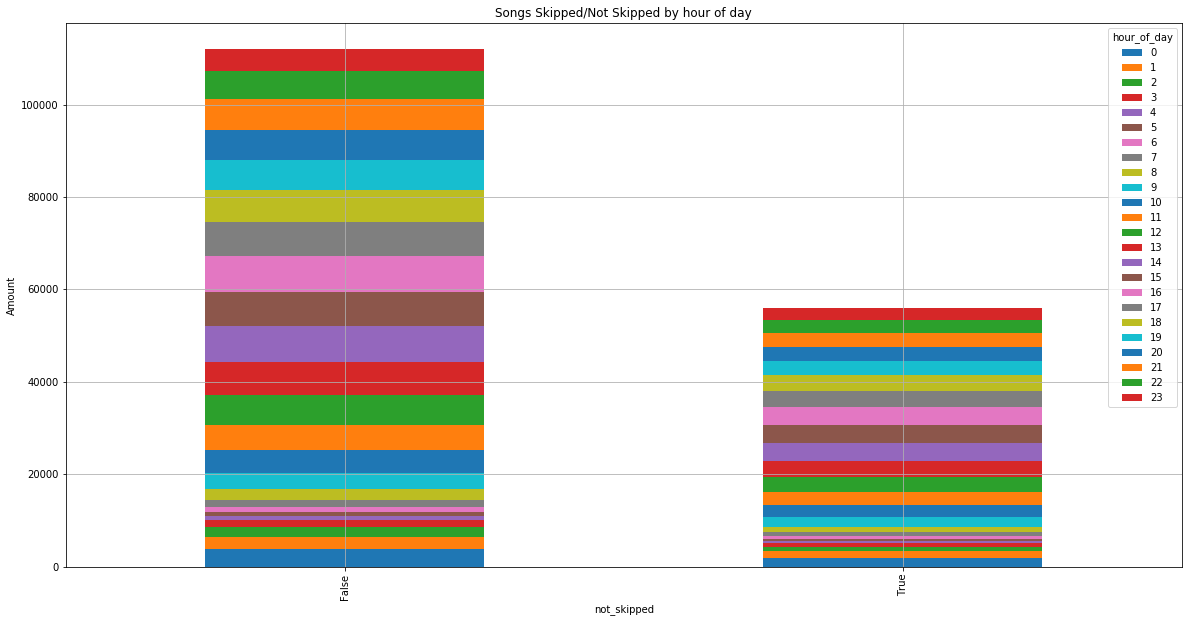

In [12]:
fig, ax = plt.subplots(figsize=(20,10))
df_music_log.groupby(['not_skipped','hour_of_day']).size().unstack().plot(kind='bar',stacked=True,ax=ax)

# Set the y axis label
ax.set_ylabel('Amount')

# Set the chart's title
ax.set_title('Songs Skipped/Not Skipped by hour of day')

# Adding the legend and showing the plot
plt.grid()
plt.show()

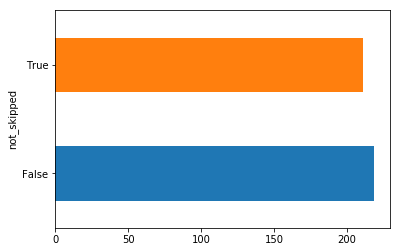

In [40]:
df_music_log.groupby(['not_skipped'])['duration'].mean().plot(kind='barh')
plt.show()

In [25]:
df_music_log.duration.describe()

count    167880.000000
mean        215.893484
std          60.223626
min          30.013330
25%         183.503403
50%         212.027023
75%         240.800003
max        1787.760986
Name: duration, dtype: float64

In [26]:
# Create new columns from not_skipped
df_music_log['not_skipped_true'] = np.where(df_music_log['not_skipped']==True, 1, 0)
df_music_log['not_skipped_false'] = np.where(df_music_log['not_skipped']==False, 1, 0)
df_music_log.head()

,track_id,duration,release_year,not_skipped,hour_of_day,premium,not_skipped_true,not_skipped_false
0,t_a540e552-16d4-42f8-a185-232bd650ea7d,109.706673,1950,False,10,True,0,1
1,t_67965da0-132b-4b1e-8a69-0ef99b32287c,187.693329,1950,True,23,True,1,0
2,t_67965da0-132b-4b1e-8a69-0ef99b32287c,187.693329,1950,False,23,True,0,1
3,t_0614ecd3-a7d5-40a1-816e-156d5872a467,160.839996,1951,True,22,True,1,0
4,t_070a63a0-744a-434e-9913-a97b02926a29,175.399994,1951,False,20,True,0,1


In [27]:
# Create new columns from premium
df_music_log['premium_true'] = np.where(df_music_log['premium']==True, 1, 0)
df_music_log['premium_false'] = np.where(df_music_log['premium']==False, 1, 0)
df_music_log.head()

,track_id,duration,release_year,not_skipped,hour_of_day,premium,not_skipped_true,not_skipped_false,premium_true,premium_false
0,t_a540e552-16d4-42f8-a185-232bd650ea7d,109.706673,1950,False,10,True,0,1,1,0
1,t_67965da0-132b-4b1e-8a69-0ef99b32287c,187.693329,1950,True,23,True,1,0,1,0
2,t_67965da0-132b-4b1e-8a69-0ef99b32287c,187.693329,1950,False,23,True,0,1,1,0
3,t_0614ecd3-a7d5-40a1-816e-156d5872a467,160.839996,1951,True,22,True,1,0,1,0
4,t_070a63a0-744a-434e-9913-a97b02926a29,175.399994,1951,False,20,True,0,1,1,0


In [28]:
# Create new dataframe with only hour_of_day, not_skipped_true, not_skipped_false
df_music_hour = df_music_log.drop(['not_skipped','premium','release_year','duration',
                                   'track_id','premium_true','premium_false'], axis=1)
df_music_hour.head()

,hour_of_day,not_skipped_true,not_skipped_false
0,10,0,1
1,23,1,0
2,23,0,1
3,22,1,0
4,20,0,1


In [29]:
# Show value counts for True/False for Premium
df_music_log.premium.value_counts()

True     136053
False     31827
Name: premium, dtype: int64

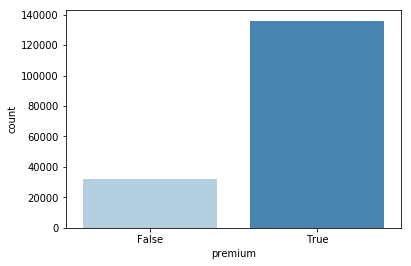

In [31]:
sns.countplot(x='premium', data=df_music_log, palette='Blues')
plt.show()

In [32]:
# Create new dataframe and add size column
grpd = df_music_hour.groupby(['hour_of_day', 'not_skipped_true','not_skipped_false']).size().to_frame('size').reset_index()
grpd.head()

,hour_of_day,not_skipped_true,not_skipped_false,size
0,0,0,1,3781
1,0,1,0,1913
2,1,0,1,2715
3,1,1,0,1412
4,2,0,1,2034


In [33]:
grpd['not_skipped_true2'] = np.where(grpd['not_skipped_true']== 1, grpd['size'],0)
grpd['not_skipped_false2'] = np.where(grpd['not_skipped_false']==1, grpd['size'],0)
grpd.head()

,hour_of_day,not_skipped_true,not_skipped_false,size,not_skipped_true2,not_skipped_false2
0,0,0,1,3781,0,3781
1,0,1,0,1913,1913,0
2,1,0,1,2715,0,2715
3,1,1,0,1412,1412,0
4,2,0,1,2034,0,2034


In [34]:
# Remove not_skipped_true, not_skipped_false, and size
grpd = grpd.drop(['not_skipped_true','not_skipped_false','size'], axis=1)
grpd.head()

,hour_of_day,not_skipped_true2,not_skipped_false2
0,0,0,3781
1,0,1913,0
2,1,0,2715
3,1,1412,0
4,2,0,2034


In [35]:
#Rename column not_skipped_true2 to not_skipped_true
grpd.rename(columns = {'not_skipped_true2':'not_skipped_true'}, inplace = True)

#Rename column not_skipped_false2 to not_skipped_false
grpd.rename(columns = {'not_skipped_false2':'not_skipped_false'}, inplace = True)

grpd.head(10)

,hour_of_day,not_skipped_true,not_skipped_false
0,0,0,3781
1,0,1913,0
2,1,0,2715
3,1,1412,0
4,2,0,2034
5,2,930,0
6,3,0,1497
7,3,787,0
8,4,0,1026
9,4,537,0


In [36]:
#Group Hour of Day by skipped true/false
grpd2 = grpd['not_skipped_true'].groupby([grpd['hour_of_day'],grpd['not_skipped_true'],grpd['not_skipped_false']]).size()
grpd2.head(48)

hour_of_day  not_skipped_true  not_skipped_false
0            0                 3781                 1
             1913              0                    1
1            0                 2715                 1
             1412              0                    1
2            0                 2034                 1
             930               0                    1
3            0                 1497                 1
             787               0                    1
4            0                 1026                 1
             537               0                    1
5            0                 843                  1
             460               0                    1
6            0                 1106                 1
             627               0                    1
7            0                 1543                 1
             823               0                    1
8            0                 2214                 1
             1183              0 